# Predicting the Amount of Shares in an Online Publication by Identifying Influential Factors

In [16]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

## Introduction:

Our group project will take a deeper look at the Online News Popularity Dataset, available at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity. There are 61 exploratory attributes in the dataset, and we will determine how some of these potentially affect an article’s number of shares (i.e. links the article has to other domains). By seeing if these attributes can affect the number of shares, it may give us an insight on how articles can best be written to drive web traffic and in return drive revenue for the company.

### Our question:

What would be the ideal combination of attributes to maximize article shares? The attributes we're investigating are the rate of "positive” and "negative" words (as determined and defined by the study), word count, publication date, and number of images. All of these variables relate to increasing web traffic.

### Identify and describe the dataset that will be used to answer the question:

We will be using the OnlineNewsPopularity.csv file dataset to answer this question. The dataset summarizes data gained from articles published by Mashable over the span of 2 years with the aim to predict the popularity of an article.

### Method:
In our future variable News_select_filtered, we will select the variables that will be useful in answering our question. Our predictors will be: global_rate_positive_words, global_rate_negative_words, num_imgs (number of images), and n_tokens_content (word count). We will perform our analysis using a scatterplot because we are comparing two variables at a time.

Since we decided to focus on shares, our model will also be built using the Linear Regression Algorithm to effectively approximate how many shares a publication will get based on the predictors listed above. Linear regression will reveal a general trend on how the predictor is affecting shares and we can use this to maximise our predictions. We considered building a model using KNN regression, but linear regression would be more effective since the data set is extremely large and we have quite a few predictors. These factors mean that performing KNN regression wouldn't be as ideal because of these limitations, as it could take extremely long to compute compared to other models. Our predictors are all scaled since their values vary drastically and can potentially cause imbalanced weighting in the algorithm. 

For our models, we will use a 70-30 split for training and testing data respectively. Decreasing the amount of training data could potentially lower the accuracy while increasing the amount of data could lead to overfitting, so 70-30 seems like the right split. Our dataset also contains a sufficient number of observations for this ratio. 

In terms of visuals, we will mostly perform our analysis using scatterplots because we are comparing two variables at a time. Since we have too much clutter in our data, we can filter by the day it was published to notice patterns more clearly. For variables that have a categorical value plotted against a numerical value (e.g. days of the week vs. shares), we will use a boxplot to represent the relationship. This allows us to separate the x-axis into each day of the week, and we can easily see if the publications for a specific day tend to have a higher share count based on where the grouping of each publication is on the y-axis. Moreover, the boxplot allows there to be a “flat-line” graph, indicating where the average share count sits for each day. 

## Expected outcomes and significance:

### What do you expect to find?
Polar words are more provocative and therefore more likely to be shared, so articles with greater global_rate_positive_words or global_rate_negative_words should have more shares. Because of the high volume of articles, there probably won’t be any strong relationships as a single variable won't majorly influence the shares, but weak relationships may still appear. For example, our preliminary data suggests that days of the week will have little effect on the article's shares. This suggests that other factors such as Topic and Subjectiveness may have a larger effect on the shares. From a personal standpoint, we've noticed that people gravitate toward shorter articles that get to the point, and news is constantly fed into society with push notifications, such that there is no set day of the week for news anymore. There can also be the case where pictures placed into articles could potentially increase reading retention for an article, thus increasing shares.

### What impact could such findings have?
By using our findings, we can help journalists figure out the best way to present information to the audience to be able to reach higher levels of user-interaction (shares) and discover new strategies to produce eye-catching articles that can make readers interested and more likely to share with family and friends.

## Preliminary exploratory data analysis:

In [17]:
set.seed(1234) #reproducible results

#Reading and downloading CSV file
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00332/OnlineNewsPopularity.zip"
download.file(url, destfile = "OnlineNewsPopularity.zip")
unzip("OnlineNewsPopularity.zip")
News <- read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  url = col_character()
)

See spec(...) for full column specifications.



### Mutation of Data

We will begin by logging shares so they are normally distributed and tidying our data. Due to an abundance of data points, and shares that are heavily skewed as they are disproportionately larger than other pieces of data (Figure 1), we apply a mutation by logging, so that our distribution of shares is more of a normal distribution (Figure 2) to accommodate for bias. We want to avoid having data with skewness as the tail region of the data essentially acts as an outlier which can adversely affect our model performance in linear regression. This can also make it easier to notice trends of the data.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



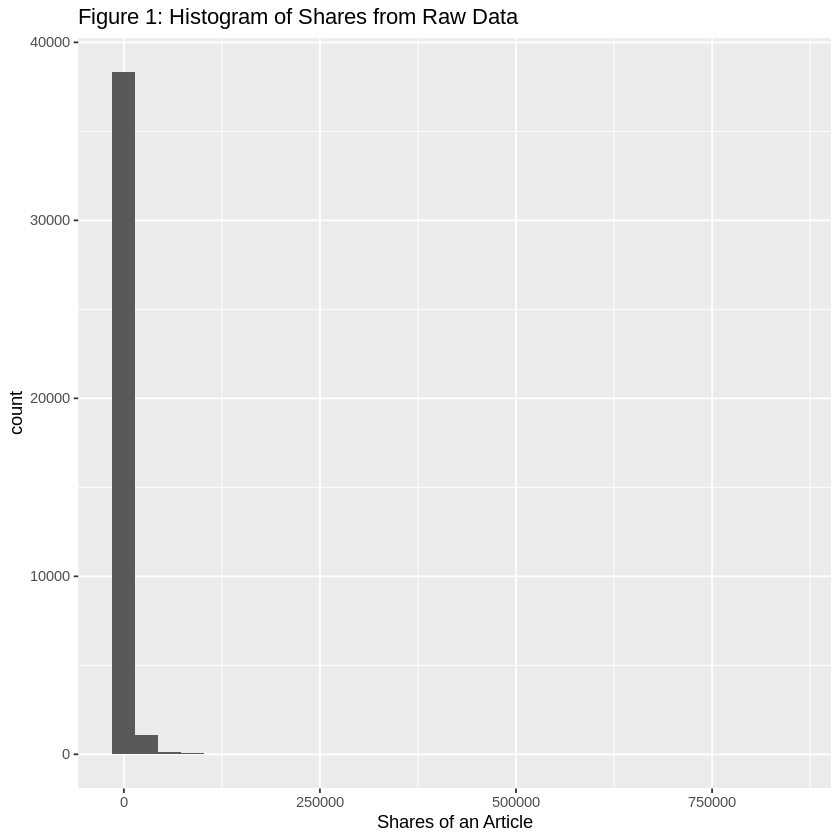

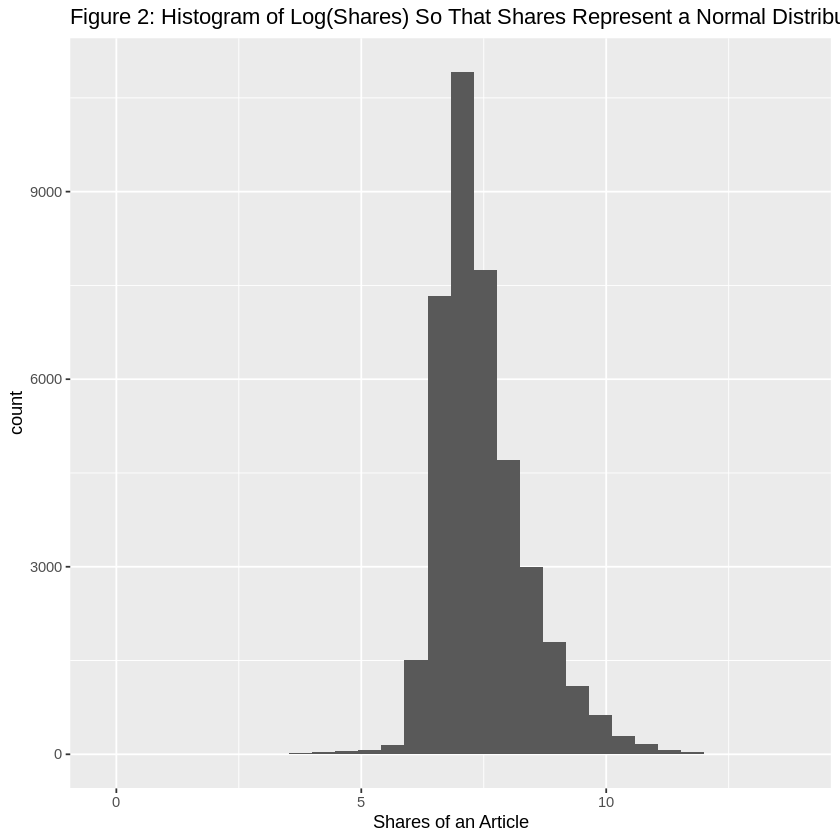

In [18]:
# Tidying published date columns
News_with_Publication <- News %>%
    mutate(date_published = case_when(weekday_is_monday == 1 ~ "Monday",
                                      weekday_is_tuesday == 1 ~ "Tuesday",
                                      weekday_is_wednesday == 1 ~ "Wednesday",
                                      weekday_is_thursday == 1 ~ "Thursday",
                                      weekday_is_friday == 1 ~ "Friday",
                                      weekday_is_saturday == 1 ~ "Saturday",
                                      weekday_is_sunday == 1 ~ "Sunday"))

News_select_filtered<- News_with_Publication %>%
    select(global_rate_positive_words, global_rate_negative_words, date_published, num_imgs, n_tokens_content, shares)


Hist_shares<- News_select_filtered%>% ggplot(aes(x=shares))+
    geom_histogram()+
    labs(x="Shares of an Article", title= "Figure 1: Histogram of Shares from Raw Data")
Hist_shares

News_select_filtered<- News_select_filtered%>%
    mutate(shares = log(shares))

Hist_shares_Scaled<- News_select_filtered%>% ggplot(aes(x=shares))+
    geom_histogram()+
    labs(x="Shares of an Article", title= "Figure 2: Histogram of Log(Shares) So That Shares Represent a Normal Distribution")
Hist_shares_Scaled


Now, we will conduct our analysis by splitting our data into training and testing sets, and examining each variable's scatterplot with the number of shares just to get a general sense of what the relationship looks like. 

[1] "Table 1: Tidy Data"

global_rate_positive_words,global_rate_negative_words,date_published,num_imgs,n_tokens_content,shares
<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>
0.04566210,0.01369863,Monday,1,219,6.385194
0.04313725,0.01568627,Monday,1,255,6.566672
0.04143126,0.02071563,Monday,1,531,7.090077
⋮,⋮,⋮,⋮,⋮,⋮
0.03393665,0.02488688,Wednesday,12,442,7.549609
0.02052786,0.02346041,Wednesday,1,682,7.003065
0.06369427,0.01273885,Wednesday,0,157,7.170120


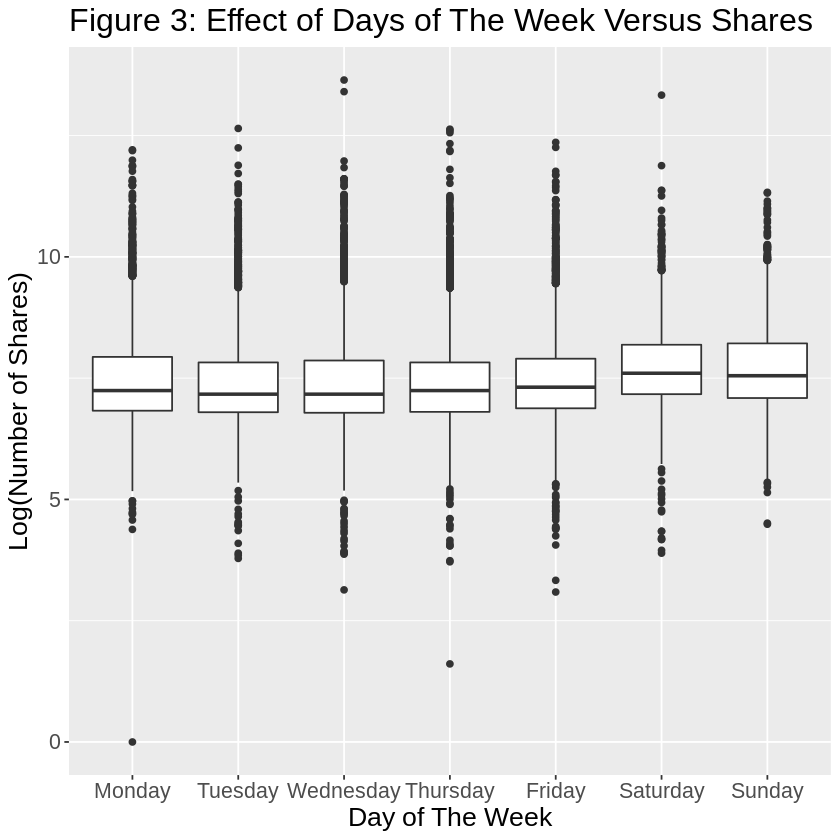

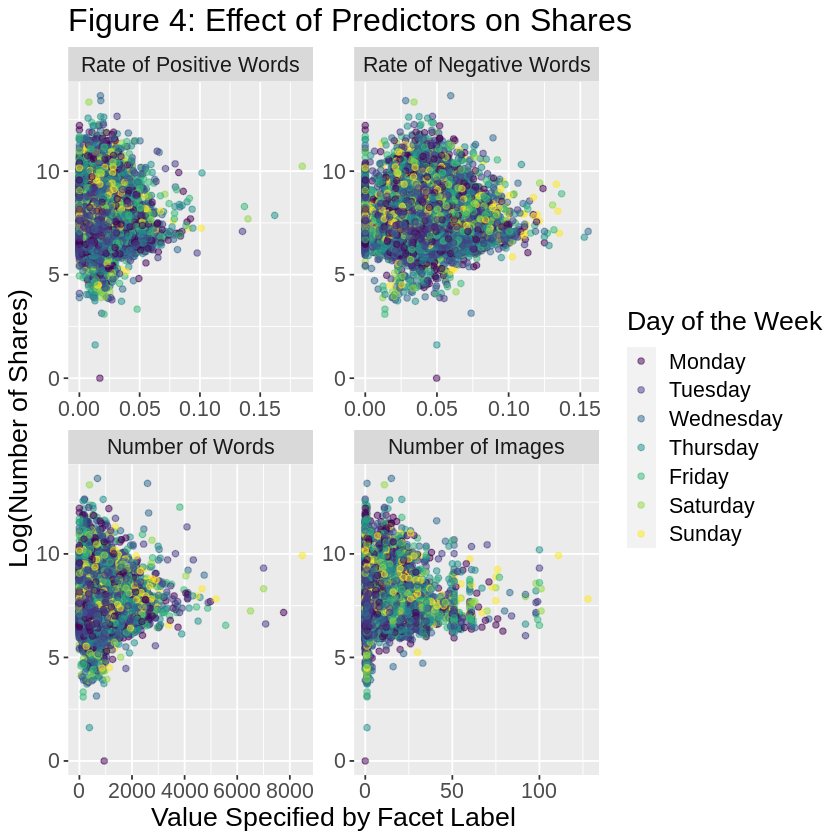

In [19]:
#70% training date, 30% testing data
News_split <- initial_split(News_select_filtered, prop = 0.70, strata = shares)
News_training <- training(News_split) # Gives the table
News_testing <- testing(News_split)

# preliminary plot analysis

News_training$date_published <- ordered(News_training$date_published,c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
box_plot<- ggplot(data=News_training, aes(as.factor(date_published), shares))+
    geom_boxplot()+ 
    labs(x="Day of The Week", 
     y= "Log(Number of Shares)", title = "Figure 3: Effect of Days of The Week Versus Shares") +
    theme(text=element_text(size=16))


# Allows us to see everything on one plot making it easier for comparison
news_gathered <- News_training %>% select(global_rate_positive_words, global_rate_negative_words, date_published, num_imgs, n_tokens_content, shares)%>%
  pivot_longer(c(global_rate_positive_words, global_rate_negative_words, num_imgs, n_tokens_content), names_to = "variables", values_to = "value")

news_all<- ggplot(news_gathered, aes(x = value, y = shares)) +
  geom_point(alpha=0.5, aes(color = date_published)) +
  facet_wrap(~variables, scales = "free",
             labeller = as_labeller(c(global_rate_positive_words = "Rate of Negative Words", num_imgs = "Number of Images",
                                      global_rate_negative_words ="Rate of Positive Words", n_tokens_content = "Number of Words"))) +
  scale_color_viridis_d()+
    labs(y = "Log(Number of Shares)", color = "Day of the Week", x = "Value Specified by Facet Label",
        title = "Figure 4: Effect of Predictors on Shares") +
    theme(text=element_text(size=16))

#Visualize Data
"Table 1: Tidy Data"
News_training
box_plot
news_all

For our preliminary analysis, we made a few example plots to try and find any relationship between variables and shares. In addition, we coloured our points (in the scatterplot) according to the day of the week it was published. In our brief viewing of the data, we can see it is very difficult to find a trend in the scatterplots due to the enormous amount of observations in the given data set. Then, when we used a boxplot for the days of the week versus shares, we can see that the weekend typically sees a higher amount of shares compared to a weekday. Our findings suggest we compare the following variables in relation to the number of shares, and we will create linear regression models in order to formulate further predictions:

# Our regression model(s):

# Linear Regression:

In the below code block, we created a linear regression model to uncover any trends.

To determine any trends in shares, we decided to compare the predictors based on their relation to each other. So with our four predictors, we grouped them as follows: Number of Images vs. Number of Words, and Rate of Positive Words vs. Rate of Negative Words.

[1] "RMSE of Images vs. Shares: "

[1] 0.9235848

[1] "RMSE of Word Count vs Shares: "

[1] 0.9278092

[1] "RMSE of Positive Word Rate vs Shares: "

[1] 0.9276188

[1] "RMSE of Negative Word Rate vs Shares: "

[1] 0.9282883

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



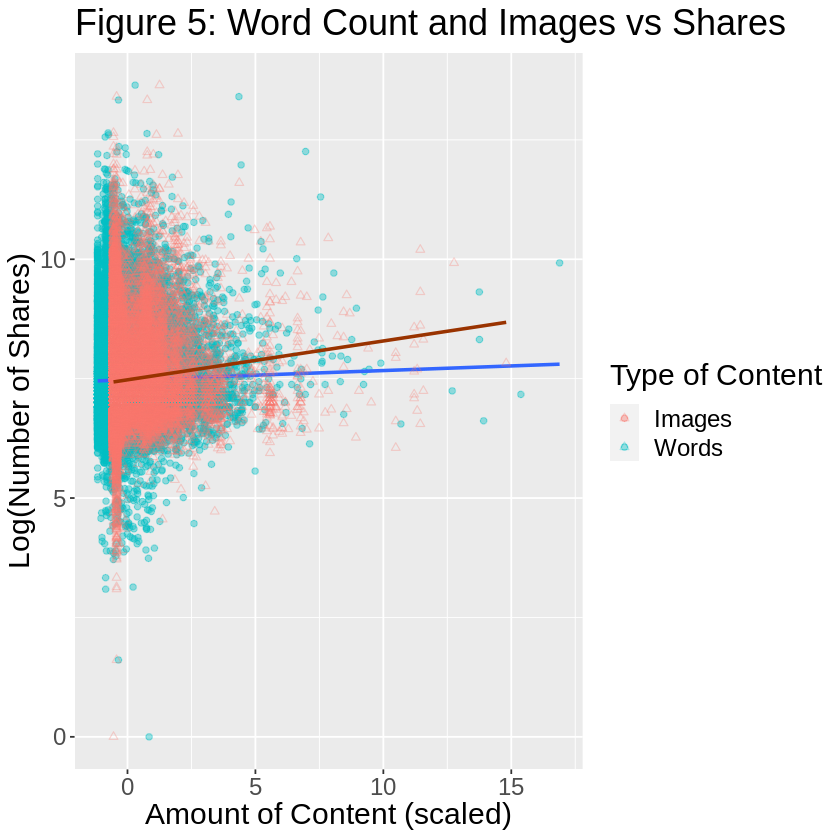

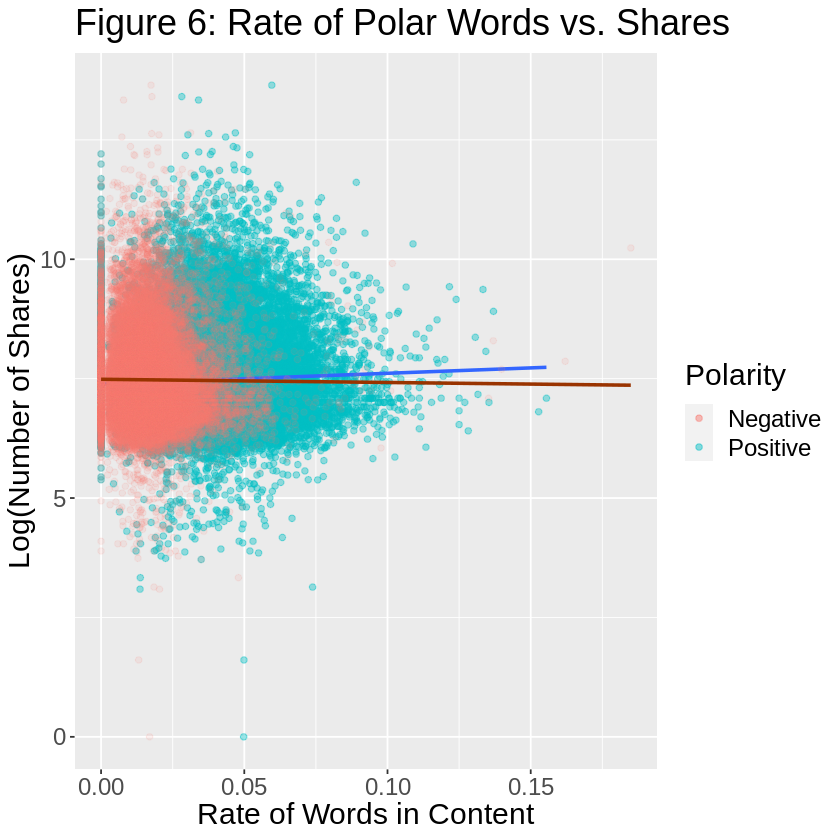

In [20]:
# Linear Regression Models
set.seed(1234)

# Scaling the data
Scaled_News_training <- News_training %>%
    mutate(scaled_num_imgs = scale(num_imgs)) %>%
    mutate(scaled_n_tokens_content = scale(n_tokens_content))

# Recipes and the Model
News_recipe_imgs <- recipe(shares ~ num_imgs, data = Scaled_News_training)
News_recipe_words <- recipe(shares ~ n_tokens_content, data = Scaled_News_training)
News_recipe_pos <- recipe(shares ~ global_rate_positive_words, data = Scaled_News_training)
News_recipe_neg <- recipe(shares ~ global_rate_negative_words, data = Scaled_News_training)

lm_spec <- linear_reg() %>% 
    set_engine("lm") %>% 
    set_mode("regression")

# Fits

lm_fit_imgs <- workflow() %>% 
    add_recipe(News_recipe_imgs) %>% 
    add_model(lm_spec) %>% 
    fit(data = News_training)

lm_fit_words <- workflow() %>% 
    add_recipe(News_recipe_words) %>% 
    add_model(lm_spec) %>% 
    fit(data = News_training)

lm_fit_pos <- workflow() %>% 
    add_recipe(News_recipe_pos) %>% 
    add_model(lm_spec) %>% 
    fit(data = News_training)

lm_fit_neg <- workflow() %>% 
    add_recipe(News_recipe_neg) %>% 
    add_model(lm_spec) %>% 
    fit(data = News_training)

#--------


# Plots

options(plot.repr.width = 7, plot.repr.height = 7)

lm_img_vs_words_plot <- Scaled_News_training %>%
    ggplot() +
    geom_point(shape = 19, aes(x=scaled_n_tokens_content, y=shares, col="Words"), alpha=0.4) +
    geom_smooth(aes(x=scaled_n_tokens_content, y=shares), method = "lm", se = FALSE) +
    geom_point(shape = 2, aes(x=scaled_num_imgs, y=shares, col="Images"), alpha=0.3) +
    geom_smooth(aes(x=scaled_num_imgs, y=shares), method = "lm", se = FALSE, col="#993300") +
    labs(x="Amount of Content (scaled)", y="Log(Number of Shares)", col="Type of Content",
         title = "Figure 5: Word Count and Images vs Shares") +
    theme(text=element_text(size=18))

lm_pos_vs_neg_plot <- News_training %>%
    ggplot() +
    geom_point(aes(x=global_rate_positive_words, y=shares, col="Positive"), alpha=0.4) +
    geom_smooth(aes(x=global_rate_positive_words, y=shares), method = "lm", se = FALSE) +
    geom_point(aes(x=global_rate_negative_words, y=shares, col="Negative"), alpha=0.1) +
    geom_smooth(aes(x=global_rate_negative_words, y=shares), method = "lm", se = FALSE, col="#993300") +
    labs(x="Rate of Words in Content", y="Log(Number of Shares)", col="Polarity", title = "Figure 6: Rate of Polar Words vs. Shares") +
    theme(text=element_text(size=18))


#---------


# Metrics

lm_img_pred <- lm_fit_imgs %>% 
    predict(News_testing) %>% 
    bind_cols(News_testing) %>% 
    metrics(truth = shares, estimate = .pred) %>%
    filter(.metric=="rmse") %>%
    pull(.estimate)

lm_words_pred <- lm_fit_words %>% 
    predict(News_testing) %>% 
    bind_cols(News_testing) %>% 
    metrics(truth = shares, estimate = .pred) %>%
    filter(.metric=="rmse") %>%
    pull(.estimate)

lm_pos_pred <- lm_fit_pos %>% 
    predict(News_testing) %>% 
    bind_cols(News_testing) %>% 
    metrics(truth = shares, estimate = .pred) %>%
    filter(.metric=="rmse") %>%
    pull(.estimate)

lm_neg_pred <- lm_fit_neg %>% 
    predict(News_testing) %>% 
    bind_cols(News_testing) %>% 
    metrics(truth = shares, estimate = .pred) %>%
    filter(.metric=="rmse") %>%
    pull(.estimate)

#--------

# All results

"RMSE of Images vs. Shares: "
lm_img_pred
"RMSE of Word Count vs Shares: "
lm_words_pred
"RMSE of Positive Word Rate vs Shares: "
lm_pos_pred
"RMSE of Negative Word Rate vs Shares: "
lm_neg_pred

lm_img_vs_words_plot
lm_pos_vs_neg_plot

### Discussion
To begin, we compared predictors n_tokens_content (number of words), and num_imgs (number of images) and discovered that the number of images had more of a positive relationship than the number of words with the number of shares (indicated by the steeper slope). From our plots, word count has a relatively neutral (flat) relationship with shares and the points tend to peak when word count stays low. Thus, it is better to keep articles short and concise to maintain audience attentiveness.
On the other hand, the number of images has a nice positive relationship with shares meaning that generally, it is better to make articles visually attractive with lots of images.

As for the rate of positive words and rate of negative words, we can see that positive words have a weak positive relationship, but the rate of negative words have a weak negative relationship. As more positive words are being used, shares increase at a small rate. As more negative words are used, share counts decrease at a slower relative rate.

Of the predictors taken into account, the number of images had the greatest positive influence on shares. In short, our analysis yielded the results of being posted on a weekend, having fewer words, more images, a lot of positivity, and the reduced use of negativity with the amount of effective images being prioritized the most. 

In terms of our RMSE, which measures the difference between the models' values and observations, 0 indicates that our model perfectly fits our data. As our RMSE increases, our confidence in the predicted value decreases. Based on this, our conclusions are not strong given relatively large RMSE values (roughly 0.9 for scaled values) and weak relationships between all variables and shares. This indicates that while our variables may have significance, our predictions could also overestimate values; variables may not have as much of an impact as we expect.

However, as previously stated, these findings may help journalists determine the best way to present information to an audience and reach higher levels of user interaction (shares). 

### Conclusion
While we were correct in the fact that the rate of positive words tended to minorly increase shares, the rate of negative words did the opposite of what we were expecting. This could be because people are a lot more likely to use positive words as keywords to search. Though with the large RMSE value we received, it is hard to tell how accurate our data is. We also expected that people gravitate towards shorter articles, but there ended up not being much of a difference. Even though people may gravitate towards short articles, people may be more likely to find something with more text as it is more likely to be found from searching keywords. The increase in images is the predictor that matched our prediction the closest. Some people may lose interest in an article and images could potentially make them read for a bit longer.

Based on our analysis, the dataset for Online News Popularity does not give us any strong indicators to determine how popular a news article may be because of how weak the relationships are. Intrinsically, this does make sense; based on the description of our variables and how the data was collected, we would require more information and not just top-level superficial text scraping. This is because keywords are very general and how articles are shared also depend on external factors like world events (e.g. the Olympics, pandemics, sports), holidays, eye-catching titles, and countless other trigger events that can cause an increase in shares. Hence we could conclude that there is no universally perfect number of images, article length, positive or negative word count that would provide optimal or predictable results. But to answer our question from our analysis, to maximize even the slightest of shares, we would advise journalists to focus on publishing the article on a weekend rather than a weekday, make it visually appealing with more images, be more descriptive and use more words, and keep the content more positive rather than negative. 

### Future Questions?
- Are there other factors (not listed in data) that play a bigger role in the number of shares? 
- Are online publications still a good way to present information, or is there another method that may be more effective?
- What is the psychology behind some of the reasons why a factor may not be as influential as another?
- Can the pieces of data that were given potentially be more effective in further detail? For example, maybe the hour that an article is published may have a greater effect than the day it’s published or instead of giving a count of words, it could give the amount of unique words used instead of total word count. While there is data for the ratio of unique words, the amount could also have potential effects.

### References

#### 1
This article by VentureBeat discusses the relevance of our selected variables in online newswriting; it cites attributes such as word count, publish date, and sensationalist writing -- which is related to positive and negative word count -- as ways to increase engagement and therefore revenue.

Liao, Jaja. “Our 8 Second Attention Span and the Future of News Media.” VentureBeat, 5 Dec. 2016, https://venturebeat.com/2016/12/04/our-8-second-attention-span-and-the-future-of-news-media/. 

#### 2

This short infographic by Business to Business (B2B) Marketing illustrates the importance of including visuals in news articles to increase web traffic, which is why we included it in our analysis.

“RESEARCH News: Articles with Images Get 94% More Views than Those Without.” B2B Marketing, 23 Aug. 2013, https://www.b2bmarketing.net/en/resources/news/research-news-articles-images-get-94-more-views-those-without.

#### 3

This is where our dataset can be found.

"Online News Popularity Data Set." UCI Machine Learning Repository, 31 May. 2015, https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity.